<a href="https://colab.research.google.com/github/srishanthdevoju/eda_tekworks/blob/main/dataset_cleaning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Bengaluru_House_Data.csv')
df.head()
df.tail()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [ ]:
df.isnull().sum()
df.drop(['society'],axis=1,inplace=True,errors='ignore')
df['bath'].fillna(df['bath'].median(),inplace=True)
df['balcony'].fillna(0,inplace=True)

def convert_sqft(x):
  if isinstance(x,str) and '-' in x:
    a,b = x.split('-')
    return (float(a)+float(b))/2
  try:
    return float(x)
  except:
    return None

df['total_sqft']=df['total_sqft'].apply(convert_sqft)
df.dropna(subset=['total_sqft'],inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()


/tmp/ipython-input-1726106092.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bath'].fillna(df['bath'].median(),inplace=True)
/tmp/ipython-input-1726106092.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


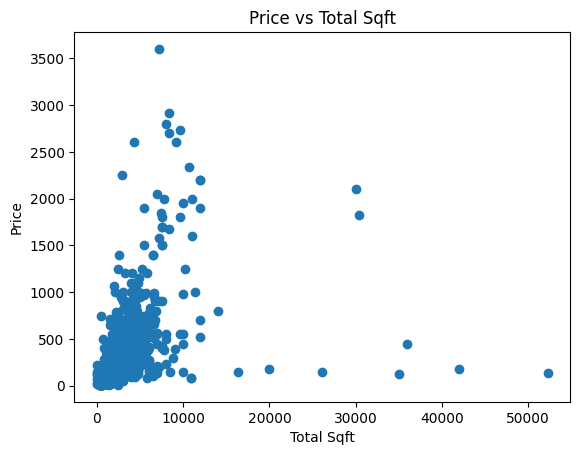

In [ ]:
from numpy import average
df['location'].nunique()
avg_price = df.groupby('location')['price'].mean().sort_values()
avg_price
avg_price.idxmax(), avg_price.max()
df[['total_sqft', 'bath', 'price']].corr()
import matplotlib.pyplot as plt

plt.scatter(df['total_sqft'], df['price'])
plt.xlabel('Total Sqft')
plt.ylabel('Price')
plt.title('Price vs Total Sqft')
plt.show()


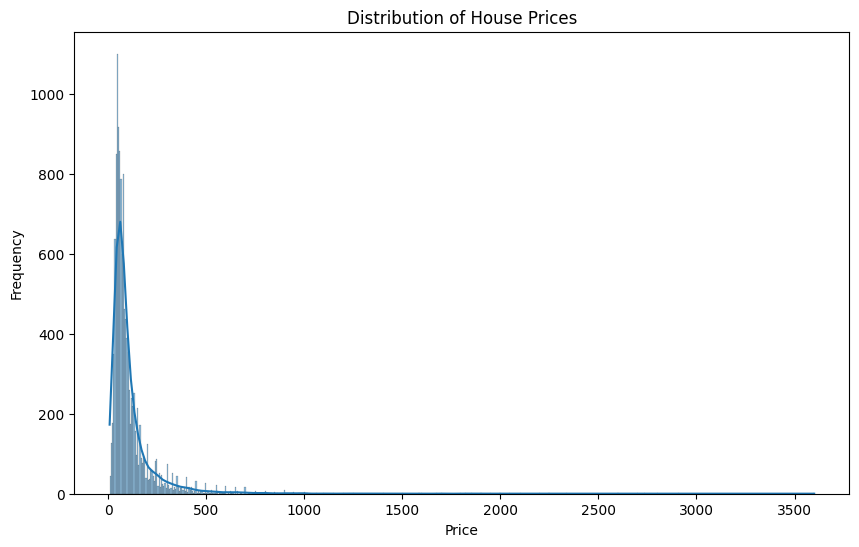

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['price'],kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()


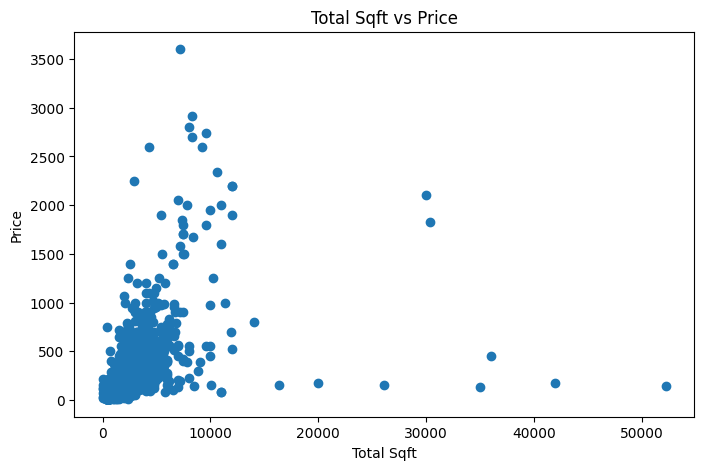

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df['total_sqft'], df['price'])
plt.title("Total Sqft vs Price")
plt.xlabel("Total Sqft")
plt.ylabel("Price")
plt.show()

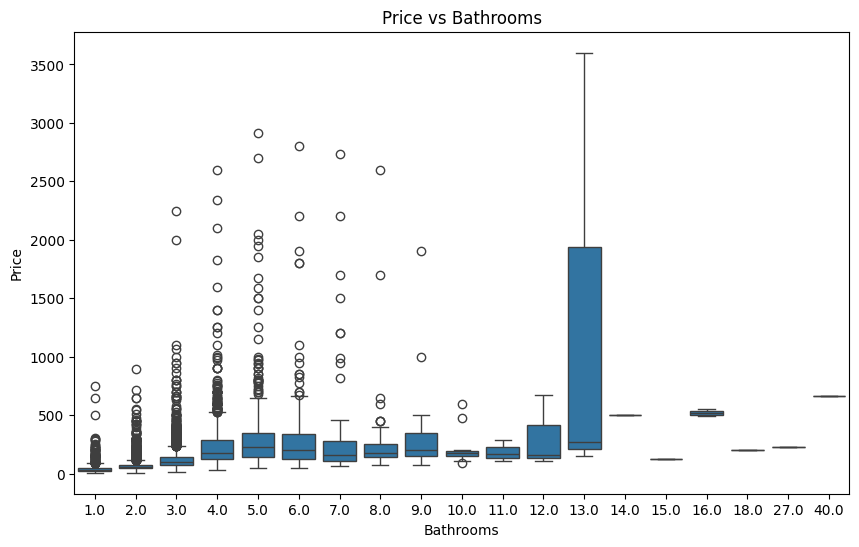

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['bath'],y=df['price'])
plt.title("Price vs Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.show()

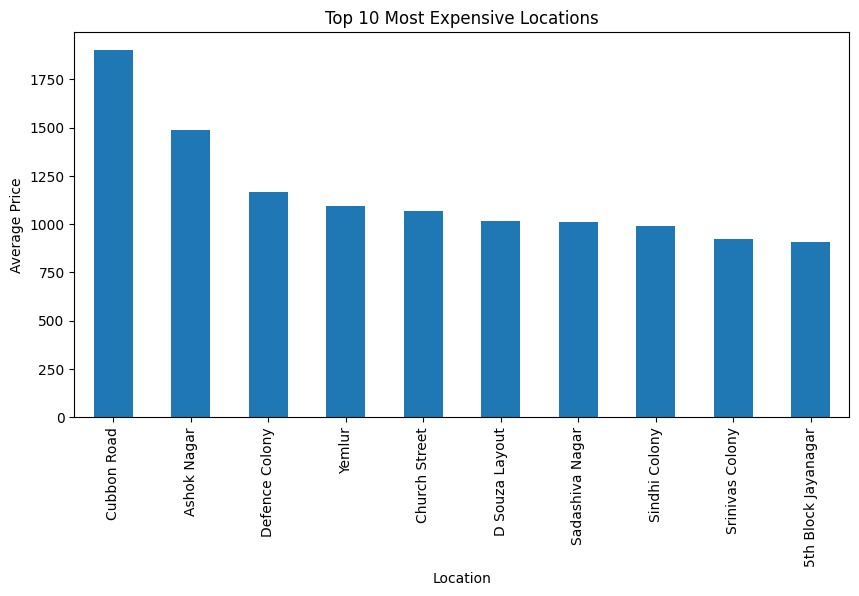

In [ ]:
top10 = df.groupby('location')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top10.plot(kind='bar')
plt.title("Top 10 Most Expensive Locations")
plt.xlabel("Location")
plt.ylabel("Average Price")
plt.show()

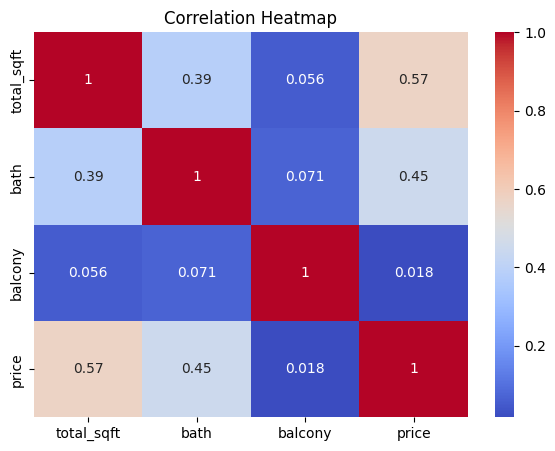

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df.to_csv('/content/drive/MyDrive/final_cleaned_dataset.csv', index=False)


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/final_cleaned_dataset.csv')
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12706 entries, 0 to 12705
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12706 non-null  object 
 1   availability  12706 non-null  object 
 2   location      12705 non-null  object 
 3   size          12690 non-null  object 
 4   total_sqft    12706 non-null  float64
 5   bath          12706 non-null  float64
 6   balcony       12706 non-null  float64
 7   price         12706 non-null  float64
dtypes: float64(4), object(4)
memory usage: 794.3+ KB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/amazon_products_dataset.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,title,brand,category,actual_price,discount_price,rating,rating_count
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0


In [ ]:
df.isnull().sum()
df = df.fillna(df.mean(numeric_only=True))
df = df.fillna("Unknown")
df= df.drop_duplicates()
df = df.apply(pd.to_numeric, errors='ignore')
df = df.reset_index(drop=True)
top5_rated = df.sort_values(by='rating', ascending=False).head(5)
top5_rated
df['brand'].value_counts().head()
# Top 5 most expensive products based on actual_price
top5_expensive = df.sort_values(by='actual_price', ascending=False).head(5)
top5_expensive
df['brand'].value_counts().head(1)
df['discount_percent'] = ((df['actual_price'] - df['discount_price']) / df['actual_price']) * 100
high_quality_products = df[(df['rating'] >= 4.5) & (df['rating_count'] >= 2000)]
high_quality_products
category_avg_price = df.groupby('category')['actual_price'].mean().sort_values(ascending=False)
category_avg_price




/tmp/ipython-input-3202585081.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


,actual_price
category,
Laptop,40822.874477
Camera,40352.246094
Monitor,39949.431596
Tablet,39943.815217
Speaker,39683.449141
Headphones,39576.147679
Smartwatch,38316.913934
Smartphone,37909.529412
Unknown,33610.500000


In [ ]:
import numpy as np
import math

df['discount_percent'] = ((df['actual_price'] - df['discount_price']) / df['actual_price']) * 100

df['price_category'] = np.where(df['actual_price'] < 500, "Budget",
                        np.where(df['actual_price'] < 2000, "Midrange", "Premium"))
df['popularity_score'] = df['rating'] * np.log(df['rating_count'] + 1)

top10_popularity = df.sort_values(by='popularity_score', ascending=False).head(10)
top10_popularity

premium_high_discount = df[(df['price_category'] == 'Premium') & (df['discount_percent'] > 40)]
premium_high_discount

bluetooth_products = df[df['title'].str.contains("Bluetooth", case=False, na=False)]
bluetooth_products

threshold = df['popularity_score'].quantile(0.70)
filtered_products = df[
    (df['rating'] >= 4.0) &
    (df['discount_percent'].between(20, 50)) &
    (df['popularity_score'] >= threshold)
]
filtered_products

avg_discount_brand = df.groupby('brand')['discount_percent'].mean().sort_values(ascending=False)
avg_discount_brand
avg_popularity_price_category = df.groupby('price_category')['popularity_score'].mean()
avg_popularity_price_category
highest_discount_category = df.groupby('category')['discount_percent'].mean().sort_values(ascending=False)
highest_discount_category

df['revenue_potential'] = df['actual_price'] * df['rating_count']

revenue_per_brand = df.groupby('brand')['revenue_potential'].sum().sort_values(ascending=False)
revenue_per_brand



,revenue_potential
brand,
HP,8.297444e+10
OnePlus,8.247380e+10
LG,8.158494e+10
Samsung,8.117230e+10
Sony,7.930446e+10
Boat,7.744874e+10
JBL,7.723438e+10
Mi,7.698029e+10
Dell,7.549826e+10


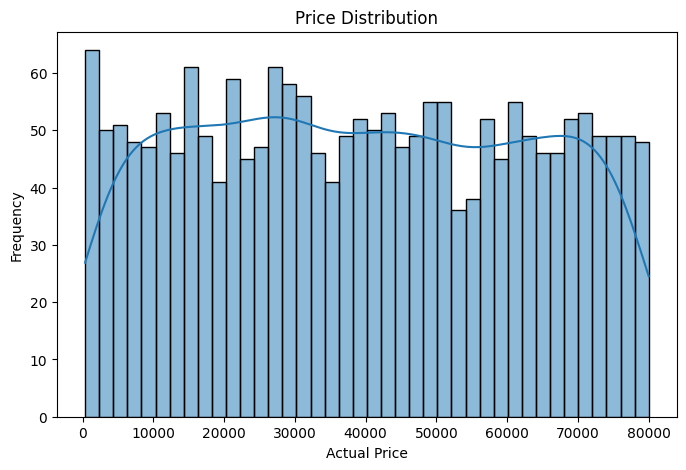

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(8,5))
sns.histplot(df['actual_price'], kde=True, bins=40)
plt.title("Price Distribution")
plt.xlabel("Actual Price")
plt.ylabel("Frequency")
plt.show()



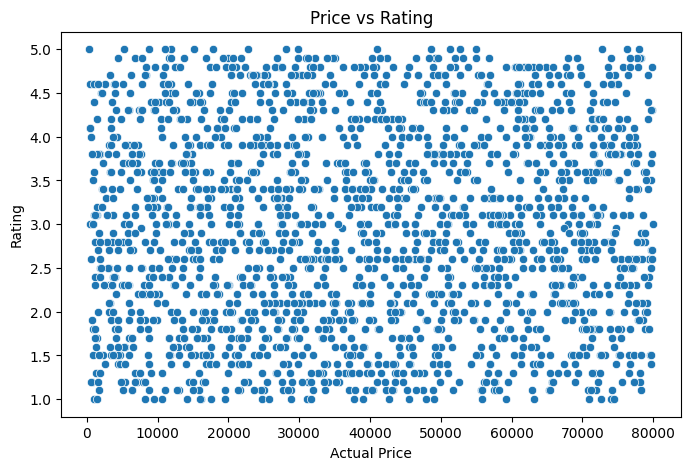

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['actual_price'], y=df['rating'])
plt.title("Price vs Rating")
plt.xlabel("Actual Price")
plt.ylabel("Rating")
plt.show()



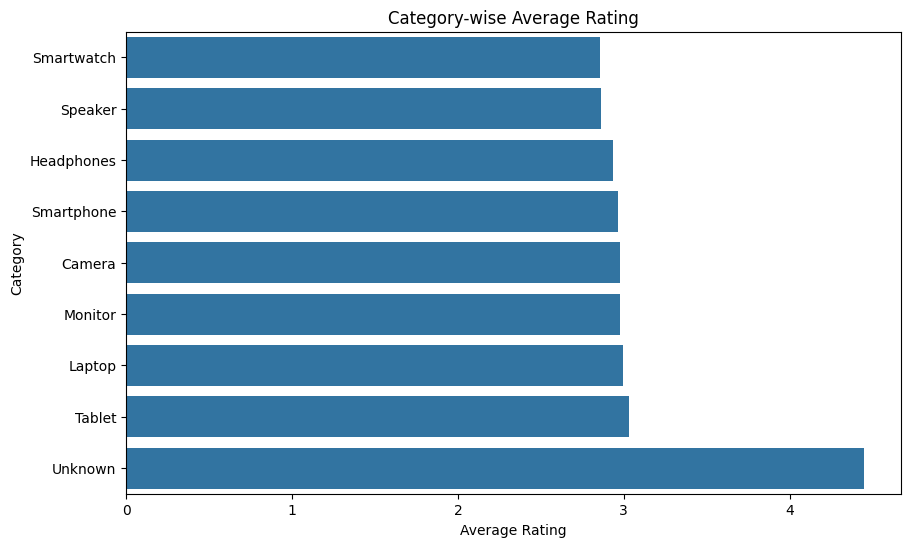

In [ ]:
cat_avg = df.groupby('category')['rating'].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=cat_avg.values, y=cat_avg.index)
plt.title("Category-wise Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.show()



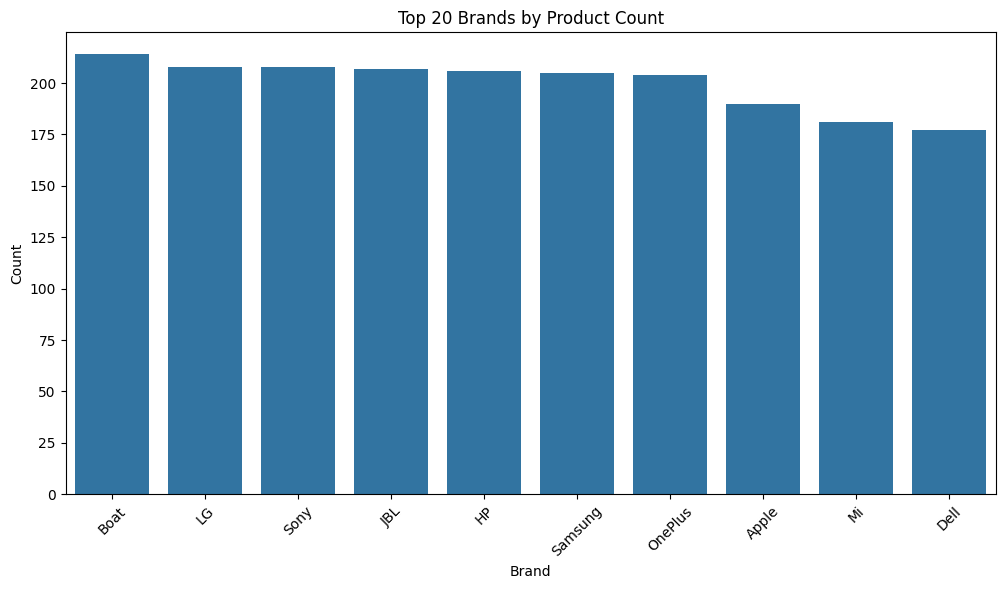

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='brand', order=df['brand'].value_counts().index[:20])
plt.title("Top 20 Brands by Product Count")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



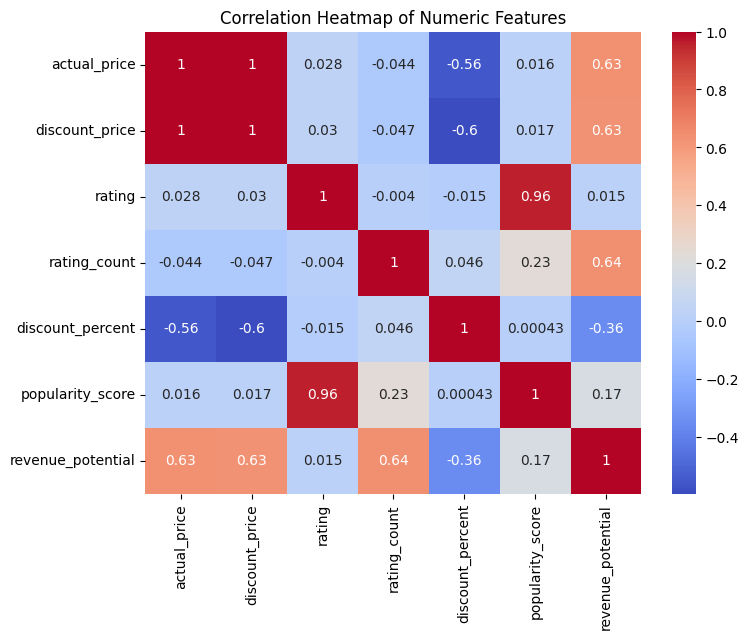

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()



In [ ]:
df.to_csv('/content/drive/MyDrive/finaldf.csv', index=False)